# 3D Image Reconstruction and Analysis in Medicine
# -----------------Image Analysis Laboratory------------------
# -=-=-=-=-=-=-=-=-=-=-Decision Tree-=-=-=-=-=-=-=-=-=-

#### Algorithm
1)  Start at the root node as parent node

2)  Split the parent node at the feature a to minimize the sum of the child node impurities (maximize information gain)

3)  Assign training samples to new child nodes

4)  Stop if leave nodes are pure or early stopping criteria is satisfied, else repeat steps 1 and 2 for each new child node

#### Stopping Rules

A maximal node depth is reached.

Splitting a node does not lead to an information gain.

#### Entropy

The entropy is defined as:  -Sum[P(i∣t).Log2(P(i∣t))]

For all non-empty classes (p(i∣t)≠0), where p(i∣t) is the proportion (or frequency or probability) of the samples that belong to class i for a particular node t.

The entropy is therefore 0 if all samples at a node belong to the same class, and the entropy is maximal if we have an uniform class distribution. For example, in a binary class setting, the entropy is 0 if p(i=1∣t)=1 or p(i=0∣t)=1. And if the classes are distributed uniformly with p(i=1∣t)=0.5 and p(i=0∣t)=0.5 the entropy is 1 (maximal), which we can visualize by plotting the entropy for binary class setting below.

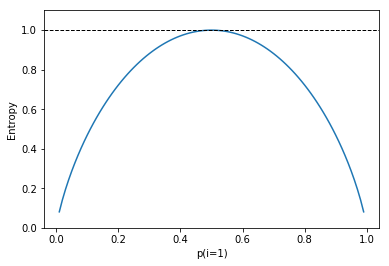

In [1]:
# Just for reading
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline


def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
plt.plot(x, ent)
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylabel('Entropy')
plt.show()

#### Gini Impurity

Sum[P(i∣t).(1-P(i∣t))]

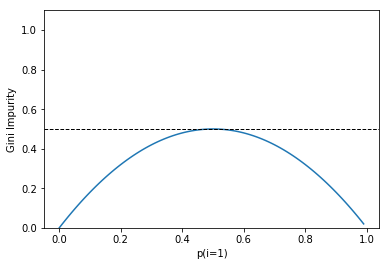

In [2]:
# Just for reading
def gini(p):
    return (p)*(1 - (p)) + (1-p)*(1 - (1-p))

x = np.arange(0.0, 1.0, 0.01)
plt.plot(x, gini(x))
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
plt.ylabel('Gini Impurity')
plt.show()

In [ ]:
# TODO: Consider the two above examples, the results of flipping fair coins. How do you interpret the diagrams?
# Flipping fair coins provides maximum entropy, with a probablity of 0.5 for heads or tails, having a maximum uncertainity

### In the following example, we will again use the Iris data set to classify three class labels for Sepal and Petal separately.

#### We construct the tree as follows:

1) we choose an attribute A with highest information gain for the full training set at the root of the tree.

2) Construct child nodes for each value of A. Each has an associated subset of vectors in which A has a particular value.

In [3]:
# Just for reading
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

c:\program files\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
# Just for reading
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [43]:
# TODO: Split the data into train and test sets using "train_test_split"
# What proportion of the data will you assign for test set?
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

In [44]:
# TODO: Build a tree using DecisionTreeClassifier
# What value do you choose for the maximum depth ?
tree = DecisionTreeClassifier(criterion='entropy',max_depth=10)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
# Just for reading
# Plotting the decision boundaries generated by the tree nodes
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=60, label='test set')

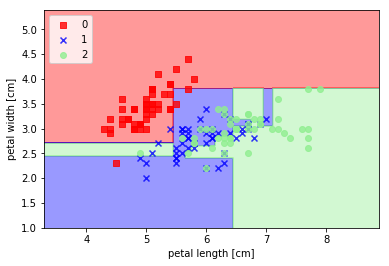

In [46]:
# TODO:
X_new = np.vstack((X_train, X_test))
y_new = np.hstack((y_train, y_test))
# TODO: Plot the decision boundary using the plot_decision_regions for Xnew and Ynew
plot_decision_regions(X_new,y_new,tree)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# TODO: In the previous cells modify the parameters "test_size", "max_depth", and "criterion" and try to find out
# their effects on the decision boundary.  
# Can you relate max_depth parameter to the concept of overfitting? How?

# A larger test size reduces bias but increases variance. The criterion also changes the decision boundary
# A deeper tree has a reduced bias, but an increased variance, with higher chances of overfitting

In [ ]:
# TODO: Repeat the previous task for Sepal features of Iris data set. 
# To do so, you only need to change "X = iris.data[:, :2]"
# Can you say which of these two feature set are more appropriate for the classification?

# Petal features seem to be more easily to become separated, not having so much overlapping as sepal features, so petal features are more appropriate

## Prediction Accuracy by Decision Trees

Here, we are going to load the Ovarian cancer data again. The purpose is to build a tree with training data and apply the test data to the same tree and calculate the prediction accuracy.

In [48]:
# TODO:

from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv('Data1.csv', header=None) # Reading the ovarian cancer data
X = data.values[:, :100]  # data features
y = data.values[:, 100]   # class labels (target)

# TODO: split the data into train and test using "train_test_split"
X_train, X_test, y_train, y_test = train_test_split(X,y)

# TODO: Build a tree using "tree.DecisionTreeClassifier"
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)

# TODO: Apply the training data and targets to the built tree using "clf.fit"
clf = clf.fit(X_train,y_train)

# TODO: predict the class labels of test data set using "clf.predict"
y_pred = clf.predict(X_test)
# TODO: Find the accuracy of the model by comparing the achieved class labels and real labels.
Test_Acc = accuracy_score(y_test, y_pred)
print("Test Accuracy : ", Test_Acc)

Test Accuracy :  0.8703703703703703


## Feature Extraction and Classification

In this simple example, we try to extract some basic features from two different images: Breast MRI and Bladder MRI.
95 images from each set were analyzed and from each image 5 basic first order statistic features were extracted. These features include Energy, Entropy, Maximum Intensity, Minimum Intensity, Average Intensity.

The class label of breast images presented by 1 and class label of bladder images was presented by 0.
All the features and class labels gathered in "Data2.csv".

Firstly, you have to train a Tree with extracted features from Data2.
Then, you should extract the 5 mentioned features from two images "Breast.jpg" and "Bladder.jpg" and use the calculated features to test the tree.

Please note that Image Energy equals the sum of square intensities of the image.

In [54]:
# TODO: read the "Data2.csv" using "pd.read_csv"
data = pd.read_csv('Data2.csv')

X = data.values[:, :5] # input data
y = data.values[:, 5] # targets

# TODO: Build a tree using "tree.DecisionTreeClassifier"
clf = tree.DecisionTreeClassifier(criterion='gini')

# TODO: Apply the input data and targets to the built tree using "clf.fit"
clf = clf.fit(X,y)

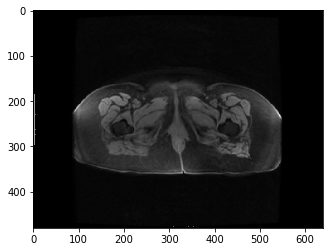

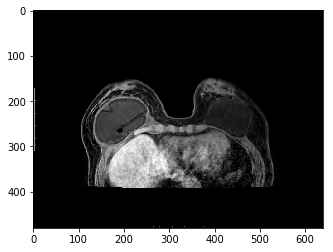

In [55]:
# TODO:
imgname1 = 'Bladder.jpg'
imgname2 = 'Breast.jpg'
image1 = cv2.imread(imgname1,0) # grayscale for process
image2 = cv2.imread(imgname2,0) # grayscale for process

# TODO: Imshow image1 and image2
plt.figure()
plt.imshow(image1,cmap='gray')

plt.figure()
plt.imshow(image2,cmap='gray')

In [56]:
# TODO:
Entropy1 = 4.612 
Entropy2 = 3.0035
Min1 = np.amin(image1)
Min2 = np.amin(image2)

# TODO: find the maximum value of image1 and imag2
Max1 = np.amax(image1)
Max2 = np.amax(image2)

# TODO: find the average intensity of image1 and imag2
Mean1 = np.average(image1)
Mean2 = np.average(image2)

# TODO: find the energy of image1 and imag2
Power1 = np.power(image1, 2)
Energy1 = Power1.sum()
Power2 = np.power(image2, 2)
Energy2 = Power2.sum()

In [57]:
# TODO: Create feature vectors array with the same size of the training data 
Test_Bladder = np.array([[Energy1,Entropy1,Max1,Min1,Mean1]])
Test_Breast = np.array([[Energy2,Entropy2,Max2,Min2,Mean2]])

In [58]:
# TODO: Apply the feature vectors to the built tree using "clf.predict"

Pred_Bladder = clf.predict(Test_Bladder)
Pred_Breast = clf.predict(Test_Breast)

print("Predicted label of Bladder image is : ", Pred_Bladder, "Real label is : ",0)
print("Predicted label of Breast image is : ", Pred_Breast, "Real label is : " ,1)

Predicted label of Bladder image is :  [1.] Real label is :  0
Predicted label of Breast image is :  [1.] Real label is :  1


## For the High Level you should use the MIALAB as follows:

Open the MiaLab

Go to Operation

Select Random Forest Segmentation Training

Add new image - from the provided files you can select 2 or 3 image (From the folder ratbrain)

From the Grand Truth, you can add the related masks.

You can Start the Training process.

After finished you can save the forest.

Then you can load the forest and add a new image for segmentation.

It would take more than 30 minutes.

##### Good Luck